In [5]:
import os
import numpy as np
import pymatbridge as pymat

In [6]:
matlab = pymat.Matlab()
matlab.start()


Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-9635f0bb-5125-45cf-8cf3-2b597c393c20
Send 'exit' command to kill the server
....MATLAB started and connected!


# Problem 5.1

Generated plots, stored as pngs


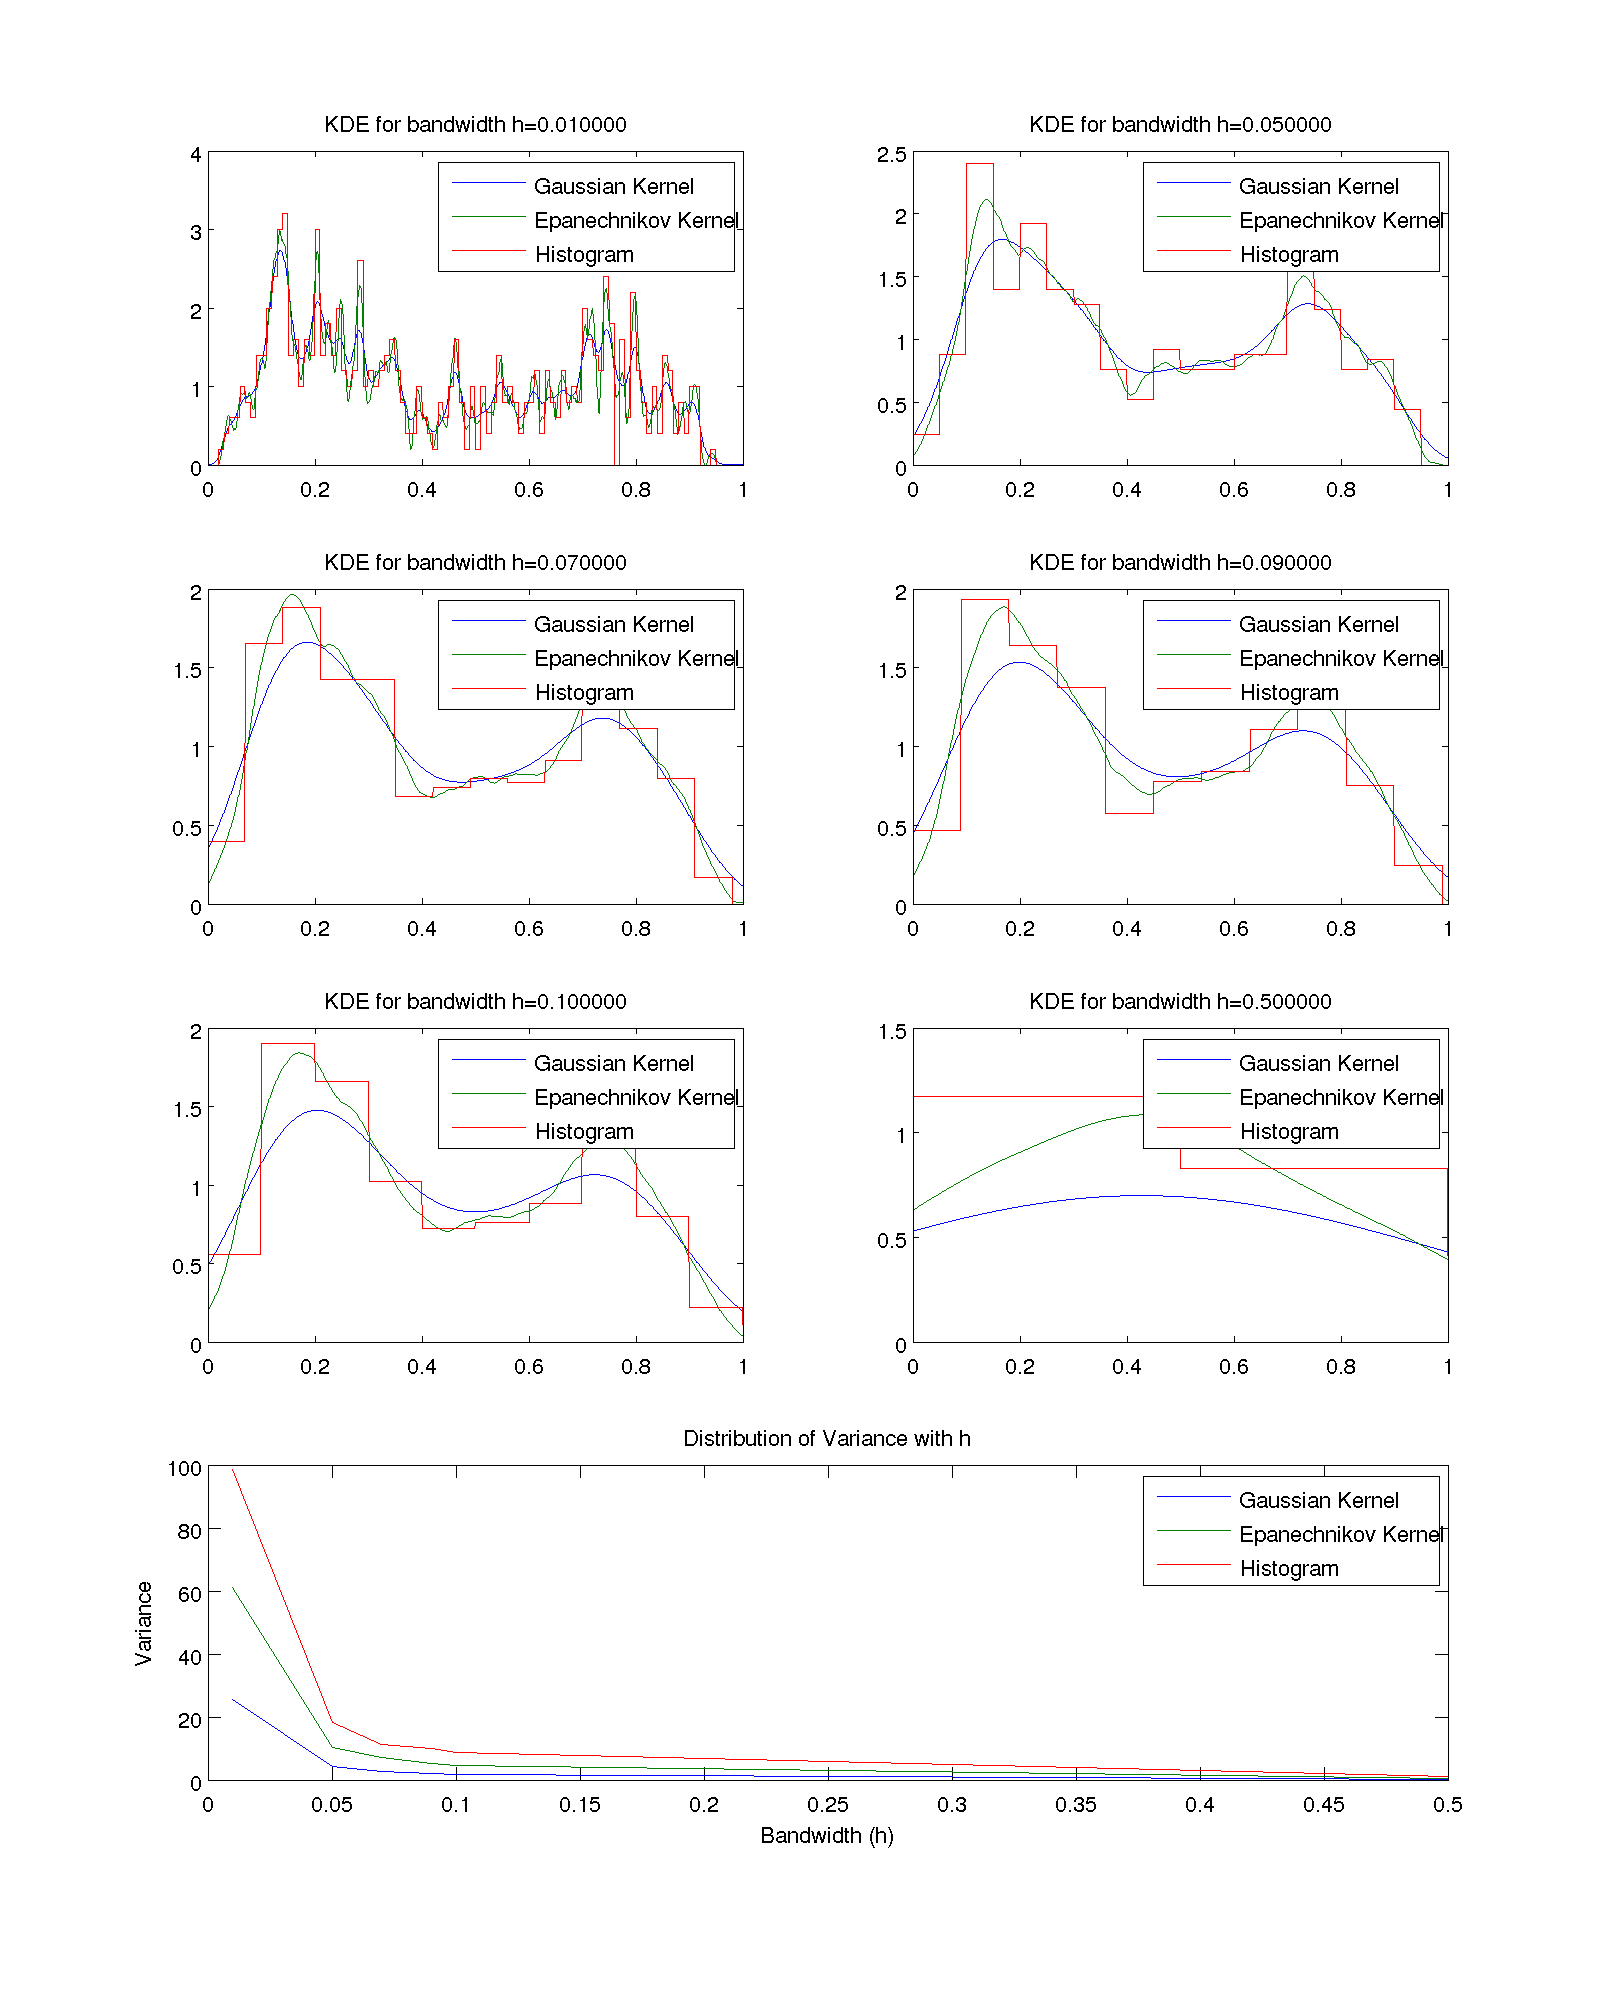

In [36]:
%%matlab --size 1600,2000

clear all;
load('hw1progde.mat');
H = [0.01,0.05,0.07,0.09,0.1,0.5];

for i=1:length(H)
    h = H(i);
    g_y = [];
    e_y= [];
    ht_y = [];    
    h_y= [];
    N_bins = ceil(1/h)+1;
    
    for j = 1:N_bins
        ht_y(end+1) = length(find( x_tr>=(j-1)*h & x_tr<(j*h) ))/(length(x_tr)*h);
    end
    
    for x = 0:0.001:1
        g_y(end+1) = problem_5_1_a(x,x_tr,h, 'gaussian');
        e_y(end+1) = problem_5_1_a(x,x_tr,h, 'epanechnikov');
        h_y(end+1) = ht_y(floor(x/h)+1);
        %h_y(end+1) = problem_5_1_a(x,x_tr,h, 'histogram');
    end
    subplot(4,2,i);
    plot(0:0.001:1,g_y,0:0.001:1,e_y, 0:0.001:1, h_y);
    legend('Gaussian Kernel','Epanechnikov Kernel', 'Histogram');
    tl = sprintf('KDE for bandwidth h=%f',h);
    title(tl);
    print(tl, '-dpng');
    
    %%%%%%%%%%% Shuffle data
    
end
test_data_size = size(x_te,1);
ix = randperm(test_data_size);
x_te_shuffled = x_te(ix);
N_split = 19;
list_size = test_data_size/N_split;
list_of_shuffled_te = [];
for i=1:N_split
    list_of_shuffled_te(end+1,:) = x_te_shuffled(list_size*(i-1)+1 : list_size*i,:);
end

var_g = [];
var_e= [];
var_h = [];


for i=1:length(H)
    h = H(i);
    x_points = linspace(0, 1, 50);
    all_fh_g = [];
    all_fh_e = [];
    all_fh_h = [];
    g_y = [];
    e_y= [];
    ht_y = [];    
    h_y= [];
    N_bins = ceil(1/h)+1;
    
    
    for i=1:N_split
        data = list_of_shuffled_te(i);    
        g_y = [];
        e_y= [];     
        h_y= [];
        ht_y = [];
        for t = 1:N_bins
            ht_y(end+1) = length(find( data>=(t-1)*h & data<(t*h) ))/(length(data)*h);
        end
    
        for j=1:length(x_points)
            x=x_points(j);
            g_y(end+1) = problem_5_1_a(x,data,h, 'gaussian');
            e_y(end+1) = problem_5_1_a(x,data,h, 'epanechnikov');
            h_y(end+1) = ht_y(floor(x/h)+1);            
        end
        all_fh_g(end+1,:) = g_y;
        all_fh_e(end+1,:) = e_y;
        all_fh_h(end+1,:) = h_y;
    end

    f_h_g = mean(all_fh_g);
    f_h_e = mean(all_fh_e);
    f_h_h = mean(all_fh_h);
    

    s_g = 0;
    for i=1:N_split
        s_g = s_g+sum((all_fh_g(i,:)-f_h_g).^2);
    end
    
    s_e = 0;
    for i=1:N_split
        s_e = s_e+sum((all_fh_e(i,:)-f_h_e).^2);
    end
    
    s_h = 0;
    for i=1:N_split
        s_h = s_h+sum((all_fh_h(i,:)-f_h_h).^2);
    end

    
    s_g=s_g/(N_split*length(x_points));
    s_e=s_e/(N_split*length(x_points));
    s_h=s_h/(N_split*length(x_points));
    var_g(end+1)=s_g;
    var_e(end+1)=s_e;
    var_h(end+1)=s_h;
end

subplot(4,2,7:8)
plot(H,var_g,H,var_e,H,var_h);

disp('Generated plots, stored as pngs');
legend('Gaussian Kernel','Epanechnikov Kernel', 'Histogram');
title('Distribution of Variance with h')
xlabel('Bandwidth (h)')
ylabel('Variance')


# Problem 5.2(d) KNN

In [41]:
%%matlab
%disp('************ Problem 5.2(d) Knn Start*******************')
%disp('Problem 5.2(d)')
[train_data, train_label] = preprocessing_ttt('hw1ttt_train.data');
[valid_data, valid_label] = preprocessing_ttt('hw1ttt_valid.data');
[test_data, test_label] = preprocessing_ttt('hw1ttt_test.data');
KKK = [1,3,5,7,9,11,13,15];
disp(sprintf('k\tTraining\tValidation\tTest'))
for i=1:length(KKK)
    t=KKK(i);
    [valid_accu, train_accu] = knn_classify(train_data, train_label, valid_data, valid_label, t);
    [test_accu, train_accu] = knn_classify(train_data, train_label, test_data, test_label, t);
    text = sprintf('%f\t%f\t%f\t%f\n', t, train_accu, valid_accu, test_accu);
    disp(text);
end

%disp('************ Problem 5.2(d) Knn End*******************')


k	Training	Validation	Test
1.000000	0.787476	0.759259	0.776744

3.000000	0.766603	0.717593	0.744186

5.000000	0.796964	0.782407	0.753488

7.000000	0.859583	0.842593	0.809302

9.000000	0.895636	0.902778	0.865116

11.000000	0.907021	0.907407	0.883721

13.000000	0.865275	0.861111	0.823256

15.000000	0.815939	0.782407	0.762791



# Problem 5.2(d) Naive Bayes

In [43]:
%%matlab
%disp('************ Problem 5.2(d) Naive Bayes Start*******************')
%disp('Problem 5.2(d)')
[train_data, train_label] = preprocessing_ttt('hw1ttt_train.data');
[valid_data, valid_label] = preprocessing_ttt('hw1ttt_valid.data');
[test_data, test_label] = preprocessing_ttt('hw1ttt_test.data');

[test_accu, train_accu] = naive_bayes(train_data, train_label, test_data, test_label);
[valid_accu, train_accu] = naive_bayes(train_data, train_label, valid_data, valid_label);
disp('-------Tic Tac Toe Data:--------');
textstr=sprintf('Training Accuracy: %f\nValidation Accuracy: %f\nTesting Accuracy:%f\n', train_accu, valid_accu, test_accu);
disp(textstr)
[train_data, train_label] = preprocessing_nursery('hw1nursery_train.data');
[valid_data, valid_label] = preprocessing_nursery('hw1nursery_valid.data');
[test_data, test_label] = preprocessing_nursery('hw1nursery_test.data');


disp('-------Nursery Data:--------');
textstr=sprintf('Training Accuracy: %f\nValidation Accuracy: %f\nTesting Accuracy:%f\n', train_accu, valid_accu, test_accu);
disp(textstr)
[test_accu, train_accu] = naive_bayes(train_data, train_label, test_data, test_label);
[valid_accu, train_accu] = naive_bayes(train_data, train_label, valid_data, valid_label);

%disp('************ Problem 5.2(d) Naive Bayes End*******************')


-------Tic Tac Toe Data:--------
Training Accuracy: 0.728653
Validation Accuracy: 0.712963
Testing Accuracy:0.730233

-------Nursery Data:--------
Training Accuracy: 0.728653
Validation Accuracy: 0.712963
Testing Accuracy:0.730233



# Problem 5.2(d) Decision Tree

In [46]:
%%matlab
[train_data, train_label] = preprocessing_ttt('hw1ttt_train.data');
[valid_data, valid_label] = preprocessing_ttt('hw1ttt_valid.data');
[test_data, test_label] = preprocessing_ttt('hw1ttt_test.data');
disp(sprintf('MinLeaf\tTrain(gdi)\tTrain(dev)\tValid(gdi)\tValid(dev)\tTest(gdi)\tValid(dev)'));
for ml=1:10
    [accu_train_gdi, accu_train_dev, accu_valid_gdi, accu_valid_dev] = decision_tree(train_data, train_label, valid_data, valid_label, ml);
    [accu_train_gdi, accu_train_dev, accu_test_gdi, accu_test_dev] = decision_tree(train_data, train_label, test_data, test_label, ml);

    text = sprintf('%f\t%f\t%f\t%f\t%f\t%f',ml, accu_train_gdi, accu_train_dev, accu_valid_gdi, accu_valid_dev, accu_test_gdi, accu_test_dev);
    disp(text);
end



MinLeaf	Train(gdi)	Train(dev)	Valid(gdi)	Valid(dev)	Test(gdi)	Valid(dev)
1.000000	0.950664	0.950664	0.870370	0.842593	0.8604650.865116	
2.000000	0.950664	0.950664	0.870370	0.842593	0.8604650.865116	
3.000000	0.950664	0.950664	0.870370	0.842593	0.8604650.865116	
4.000000	0.948767	0.948767	0.875000	0.847222	0.8837210.883721	
5.000000	0.941176	0.939279	0.875000	0.856481	0.8744190.869767	
6.000000	0.935484	0.933586	0.861111	0.842593	0.8883720.883721	
7.000000	0.927894	0.925996	0.870370	0.851852	0.8976740.893023	
8.000000	0.920304	0.918406	0.856481	0.837963	0.8976740.893023	
9.000000	0.914611	0.882353	0.879630	0.824074	0.8604650.823256	
10.000000	0.912713	0.880455	0.856481	0.800926	0.8883720.851163	


# Problem 5.2(e) Decision boundary

Generated plots, nothing to output


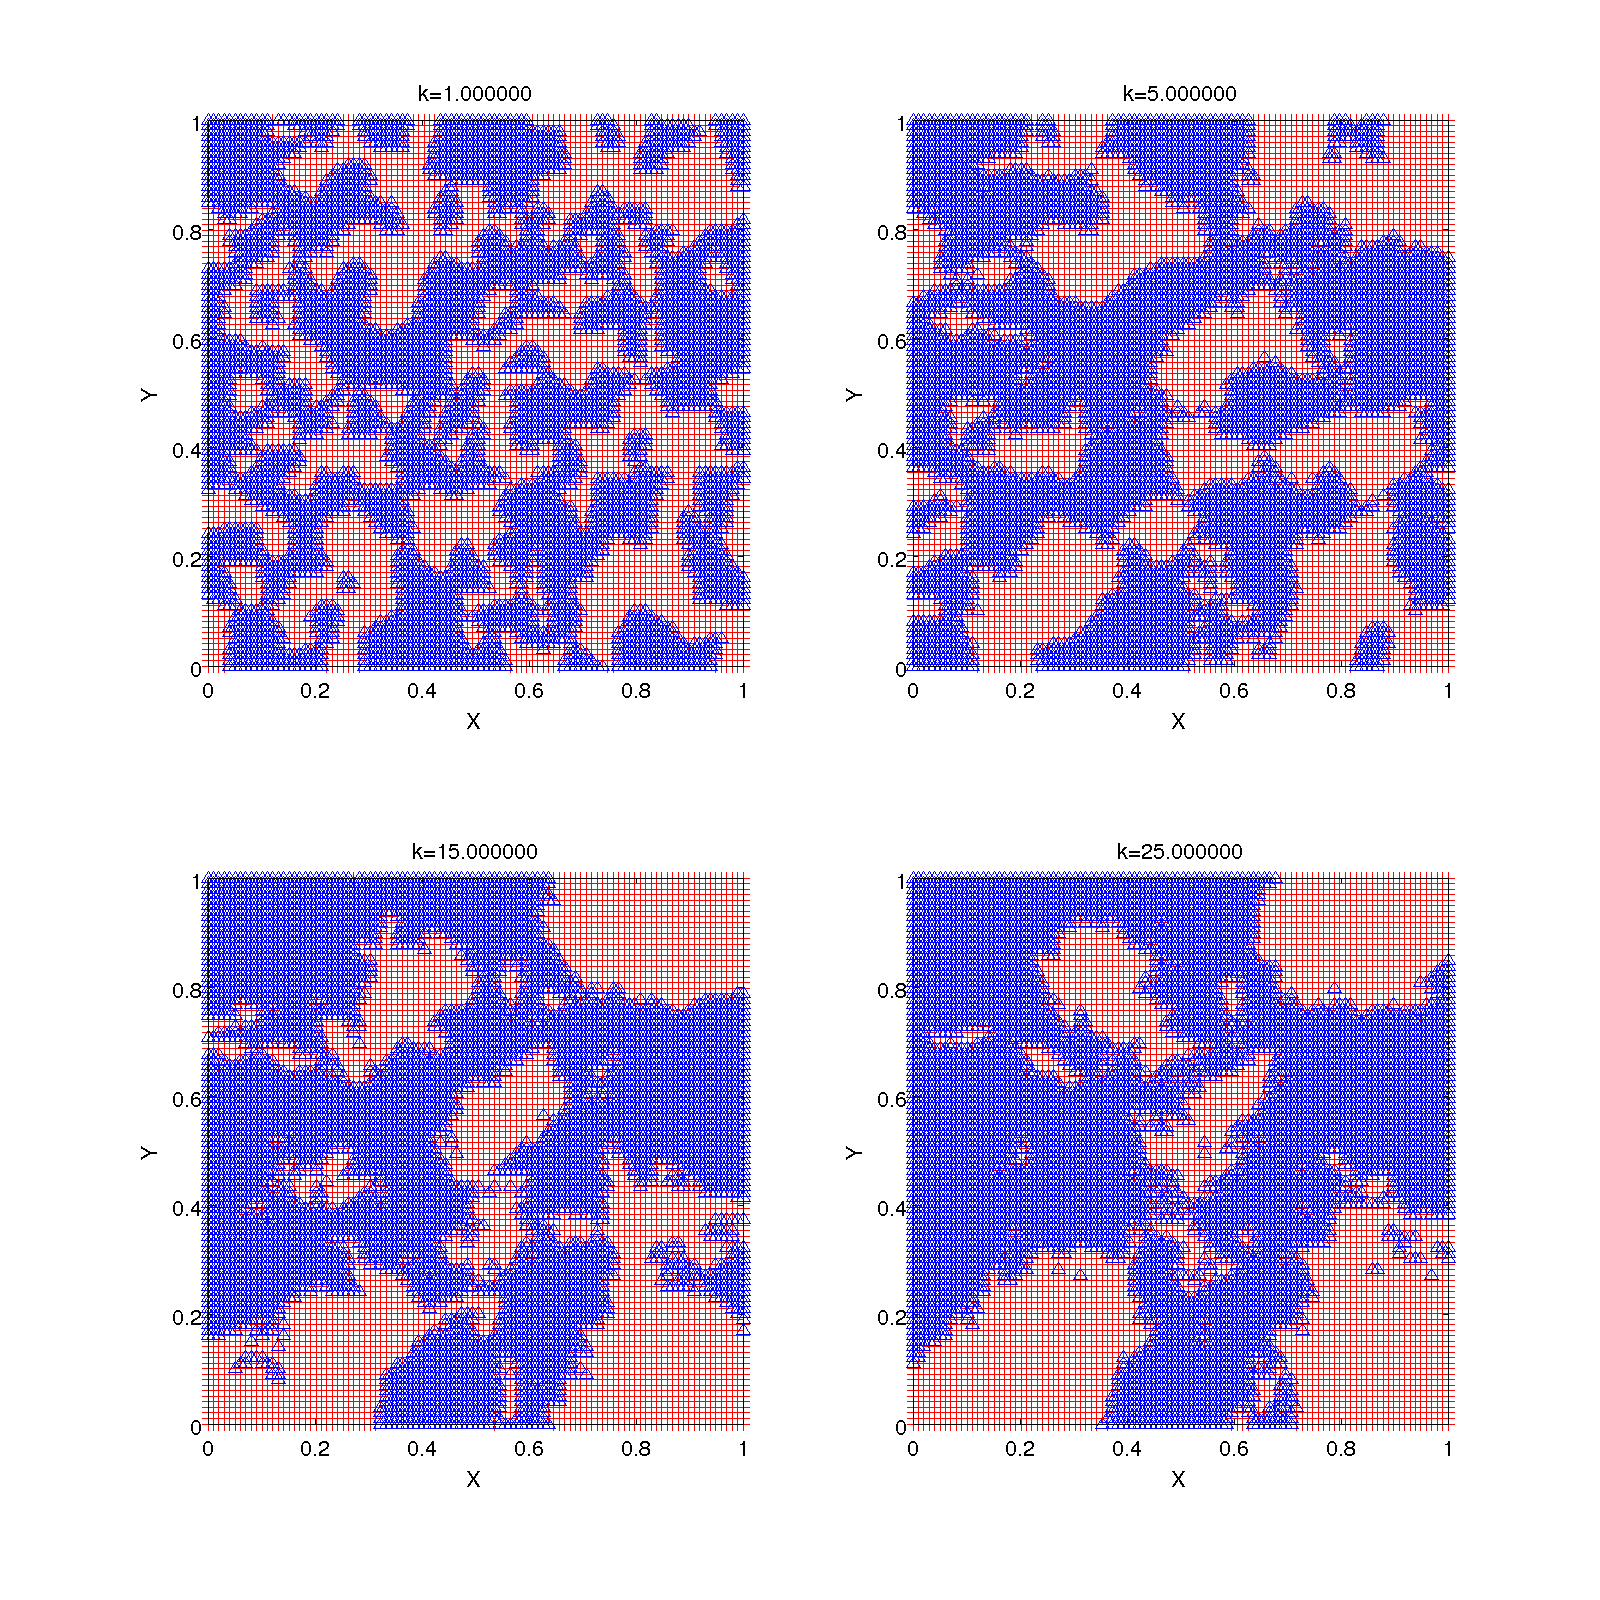

In [49]:
%%matlab --size 1600,1600

load('hw1boundary.mat');
%new_data = unifrnd(0,1,100,100);
new_x = linspace(0,1,100);
new_y = linspace(0,1,100);
new_data =  [];%[new_x; new_y];
for i=1:length(new_x)
    x = new_x(i);
    for j=1:length(new_y)
        y= new_y(j);
        new_data(end+1,:) = [x,y];
    end
end

KKK=[1,5,15,25];
for i=1:4    
    k=KKK(i);
    [train_accu, test_data_labels, train_data_labels] = knn_decision_boundary(features, labels, new_data, KKK(i));
    
    pluses = new_data(test_data_labels == 1,:);
    minuses = new_data(test_data_labels == -1,:);
    subplot(2,2,i)
    plot(pluses(:,1),pluses(:,2),'r+', minuses(:,1),minuses(:,2),'b^');
    xlabel('X');
    ylabel('Y');
    title(sprintf('k=%f',k));
    textstr = sprintf('boundary_k%f.png',k);    
end
disp('Generated plots, nothing to output');